<a href="https://colab.research.google.com/github/Agusismande/Pasantia_LT/blob/main/DatosLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
from numpy.random import seed
from time import time

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Pasantia/datosPasantia.csv'
datos = pd.read_csv(path)
datos = pd.read_csv(path, sep=';')

datos

,Fecha,CO(ppb),NO2(ppb),PM10(ug/m3),PM2.5(ug/m3),PM1(ug/m3),O3_NO2
0,10/1/2024 0:00,304.0,NaN,2.64,3.22,2.79,NaN
1,10/1/2024 0:01,NaN,NaN,4.21,2.61,2.41,NaN
2,10/1/2024 0:02,NaN,NaN,5.57,3.73,2.28,NaN
3,10/1/2024 0:03,NaN,NaN,5.29,2.56,2.74,NaN
4,10/1/2024 0:04,NaN,NaN,4.31,3.22,2.03,NaN
...,...,...,...,...,...,...,...
135356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135359,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convertir la columna 'Fecha' a tipo DateTime si aún no lo está
datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%d/%m/%Y %H:%M')
# Establecer la columna 'Fecha' como índice del DataFrame
datos.set_index('Fecha', inplace=True)

# Remuestrear los datos por horas y calcular el promedio de los valores dentro de cada hora
datos_resampleado = datos.resample('H').mean()

# Mostrar el DataFrame remuestreado
print(datos_resampleado)

                     CO(ppb)  NO2(ppb)  PM10(ug/m3)  PM2.5(ug/m3)  PM1(ug/m3)  \
Fecha                                                                           
2024-01-10 00:00:00   310.00      2.00     4.519000      3.084000    2.356000   
2024-01-10 01:00:00   215.75      2.25     3.962167      2.435667    1.747167   
2024-01-10 02:00:00   179.25      1.75     4.369500      2.614500    1.811667   
2024-01-10 03:00:00   163.50      1.00     4.538833      2.829333    2.084333   
2024-01-10 04:00:00   175.25      1.00     7.487000      4.683667    3.421167   
...                      ...       ...          ...           ...         ...   
2024-04-10 19:00:00   185.25      0.25    11.367333      6.562833    4.393000   
2024-04-10 20:00:00   186.00      0.00    10.763167      6.698833    2.764333   
2024-04-10 21:00:00   181.75      0.00     9.794167      6.240667    3.762727   
2024-04-10 22:00:00   182.50      0.00     9.106667      5.572000    4.304833   
2024-04-10 23:00:00   183.25

Metricas estadisticas

In [ ]:
print(datos_resampleado.describe())


           CO(ppb)     NO2(ppb)  PM10(ug/m3)  PM2.5(ug/m3)   PM1(ug/m3)  \
count  1777.000000  1919.000000  1887.000000   1943.000000  1622.000000   
mean    212.487854     1.587763     8.123368      5.101158     3.398007   
std     100.150885     2.658948     5.626257      3.665668     2.590082   
min     119.750000     0.000000     0.886167      0.447500     0.142333   
25%     162.000000     0.250000     4.502250      2.615583     1.839500   
50%     188.750000     1.000000     6.870667      4.212167     2.791750   
75%     231.000000     2.000000    10.150861      6.697167     4.237042   
max    1634.000000    59.750000    68.208000     37.708667    26.358500   

            O3_NO2  
count  1082.000000  
mean     17.867221  
std       5.297372  
min       8.000000  
25%      13.500000  
50%      17.750000  
75%      21.250000  
max      37.000000  


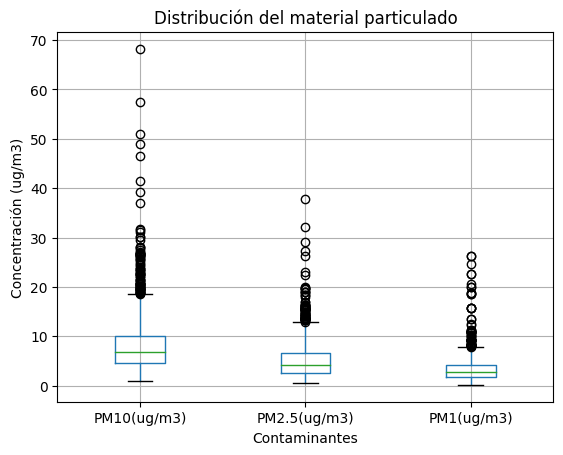

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
datos_interes = datos_resampleado[['PM10(ug/m3)', 'PM2.5(ug/m3)', 'PM1(ug/m3)']]

# Graficar un boxplot para las columnas seleccionadas
datos_interes.boxplot()

# Establecer el título del gráfico
plt.title('Distribución del material particulado')

# Establecer el nombre del eje x
plt.xlabel('Contaminantes')

# Establecer el nombre del eje y
plt.ylabel('Concentración (ug/m3)')

# Mostrar la gráfica
plt.show()



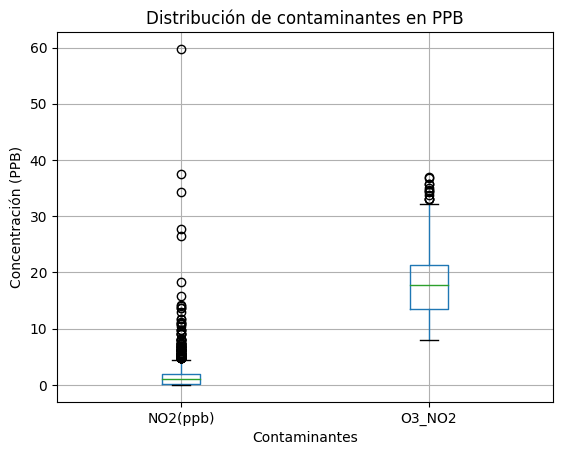

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
datos_interes = datos_resampleado[['NO2(ppb)','O3_NO2']]

# Graficar un boxplot para las columnas seleccionadas
datos_interes.boxplot()

# Establecer el título del gráfico
plt.title('Distribución de contaminantes en PPB')

# Establecer el nombre del eje x
plt.xlabel('Contaminantes')

# Establecer el nombre del eje y
plt.ylabel('Concentración (PPB)')

# Mostrar la gráfica
plt.show()



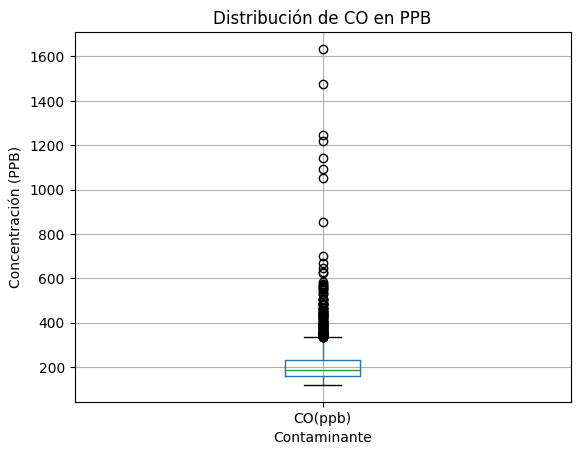

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
datos_interes = datos_resampleado[['CO(ppb)']]

# Graficar un boxplot para las columnas seleccionadas
datos_interes.boxplot()

# Establecer el título del gráfico
plt.title('Distribución de CO en PPB')

# Establecer el nombre del eje x
plt.xlabel('Contaminante')

# Establecer el nombre del eje y
plt.ylabel('Concentración (PPB)')

# Mostrar la gráfica
plt.show()
